<a href="https://colab.research.google.com/github/everval/AQM2021/blob/main/Exercises_Lecture3_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises Confidence Intervals and Hypothesis Tests

We start by loading the required packages.

In [ ]:
import numpy as np #Package for numerical multidimensional tables
import pandas as pd #Package for data frames
import matplotlib.pyplot as plt #Package for plots and graphs
import random as rnd #Package for random number generation
from scipy.stats import norm #Import the Normal distribution from the scipy.stats package
from scipy.stats import binom  #Importing the binomial distribution
from scipy.stats import chi2  #Importing the binomial distribution
from scipy.stats import t  #Importing the binomial distribution

## 1

In the lecture we analyzed the effect that a change on the degrees of freedom has on the Chi-squared distribution.

Now you are going to analyze the effect of a change on the degrees of freedom has on the t distribution.



*   Import the t distribution from the scipy.stats package.
*   Make a grid of values from -6 to 6.
*   Plot the pdf for $t_1,t_2,t_{5},t_{30}$. You can use a **for** loop for this.
*   Add the pdf of the standard Normal distribution to your plot.

What do you see happens to the t distribution as you increase the degrees of freedom?

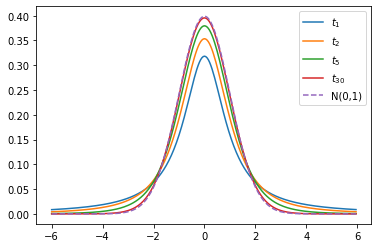

In [ ]:
from scipy.stats import t
vals = list(np.arange(-6,6,0.05))  #New grid
val_dfs = [1, 2, 5, 30]    #Different location parameters

for i in range(0,4):
    plt.plot(vals,t.pdf(vals,df=val_dfs[i])) #A plot for each location parameter

plt.plot(vals,norm.pdf(vals,loc=0,scale=1),linestyle="--")
plt.legend(["$t_1$","$t_2$","$t_5$","$t_{30}$","N(0,1)"])
plt.show()

## 2

Let $X\sim \chi^2_{10}$ and $Y\sim t_{5}$. Compute the following probabilities:

*   $P(X>10)$
*   $P(2<X<5)$
*   $P(-2<Y<2)$
*   $P(Y<0)$


In [ ]:
df_chi = 10
df_t = 5

display(1-chi2.cdf(10,df=df_chi))
display(chi2.cdf(5,df=df_chi)-chi2.cdf(2,df=df_chi))
display(t.cdf(2,df=df_t)-t.cdf(-2,df=df_t))
display(t.cdf(0,df=df_t))

0.9122663151160746

0.05913678786613755

0.8980605211701418

0.5

## 3

You are going to run the hypothesis test on whether Family Guy is a good show.

For that, you will follow the steps below.


### a) Load the data, print it and create an hisogram.


Saving FamilyGuy_ratings.csv to FamilyGuy_ratings.csv
     Season  Episode                        Title   Year  Votes  Rating
0         1        1            Death Has a Shadow  1999   3058     7.8
1         1        2      I Never Met the Dead Man  1999   2288     7.6
2         1        3      Chitty Chitty Death Bang  1999   2180     7.7
3         1        4              Mind Over Murder  1999   2066     7.5
4         1        5         A Hero Sits Next Door  1999   2012     7.5
..      ...      ...                           ...   ...    ...     ...
364      19       16              Who's Brian Now?  2021    357     6.9
365      19       17             Young Parent Trap  2021    372     7.3
366      19       18           Meg Goes to College  2021    329     6.9
367      19       19                    Family Cat  2021    358     7.3
368      19       20  Tales of Former Sports Glory  2021    375     6.3

[369 rows x 6 columns]


Text(0.5, 1.0, 'Family Guy Ratings')

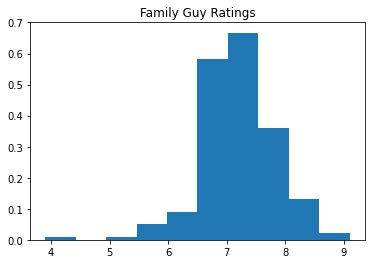

In [ ]:
from google.colab import files
uploaded = files.upload()

fm = pd.read_csv('FamilyGuy_ratings.csv') #Load the data
print(fm)
plt.hist(fm['Rating'], bins=10, density=True) #Creating the histogram of the random sample
                                        #We make the option density true so the bins sum to 1
plt.title('Family Guy Ratings')

### b) Compute the mean and standard deviation of the data for latter use. Display the values.

In [ ]:
mean_fm = np.mean(fm['Rating'])  #Compute the sample mean
std_fm = np.std(fm['Rating'])  #Compute the sample standard deviation

display([mean_fm,std_fm])

[7.171815718157177, 0.6335405811289605]

### c) Using the CLT, compute the mean and standard deviation for the sample mean. Display your results. Plot the Normal distribution from the CLT.

[7.171815718157177, 0.03298080528800113]

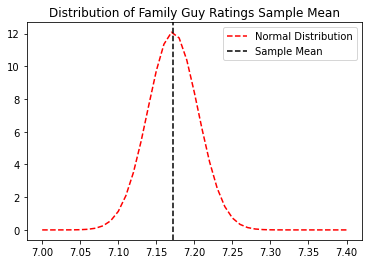

In [ ]:
mean_sample_mean = mean_fm  #Computing the mean of the CLTs distribution
std_sample_mean = std_fm/np.sqrt(369)  #Computing the standard deviatoin of the CLTs distribution

display([mean_sample_mean,std_sample_mean])

vals = np.arange(7,7.4,0.01)  #Making a grid for the 'x' axis

nor_vals = norm.pdf(vals,loc=mean_sample_mean,scale=std_sample_mean) #Evaluating the Normal
plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density of the sample mean
plt.title('Distribution of Family Guy Ratings Sample Mean')
plt.axvline(mean_fm,color="black",linestyle="--")    #Adding vertical line at the mean
plt.legend(["Normal Distribution", "Sample Mean"], loc="upper right")  #Adding a legend
plt.show()

### d) Under the assumption that the standard deviation is known, compute a 95% confidence interval for the sample mean.

In [ ]:
lim_inf = mean_sample_mean-1.96*std_sample_mean  #Confidence Invertals lim inf
lim_sup = mean_sample_mean+1.96*std_sample_mean

display([lim_inf, lim_sup])

[7.107173339792695, 7.236458096521659]

### e) Under the correct assumption of an unknown standard deviation, compute the t statistic of the hypothesis test:

> $H_0: \overline{FamilyGuyRatings}\geq 7.5$ 

against the alternative

> $H_a: \overline{FamilyGuyRatings}< 7.5$ 

Plot the t distribution associated to the test.

-9.950766179812506

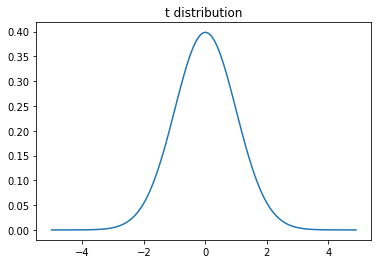

In [ ]:
t_0 = (mean_sample_mean-7.5)/(std_sample_mean)  #Compute the tests statistic
display(t_0)

vals = np.arange(-5,5,0.1)   #New grid
plt.plot(vals,t.pdf(vals,df=369))  #Plot evaluating the t distribution directly
plt.title("t distribution")
plt.show()

### f) Obtain the critical value for the test. That is, evaluate the percent point function of the t distribution at 0.05 with the correct number of degrees of freedom.

Compare the value just obtained against the t statistic defined in e), and reach a conclusion.

In [ ]:
z_alpha_1side = t.ppf(0.05,df=369)  #Critical value from the oercent point function

display(z_alpha_1side)

-1.6489935325454725

### g) Compute the p-value of the test

In [ ]:
t.pdf(t_0,df = 369)   #Evaluating the p-value

3.1766105357511974e-20